In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

## 1. Introduction to model validation

### 1.1. Modeling steps

The process of using scikit-learn to create and test models has four steps, and you will use these four steps throughout this course.

Which of the following is NOT a valid method in the four-step scikit-learn model validation framework?

> `.validate()`

### 1.2. Seen vs. unseen data

Model's tend to have higher accuracy on observations they have seen before. In the candy dataset, predicting the popularity of Skittles will likely have higher accuracy than predicting the popularity of Andes Mints; Skittles is in the dataset, and Andes Mints is not.

You've built a model based on 50 candies using the dataset `X_train` and need to report how accurate the model is at predicting the popularity of the 50 candies the model was built on, and the 35 candies (`X_test`) it has never seen. You will use the mean absolute error, `mae()`, as the accuracy metric.

- Using `X_train` and `X_test` as input data, create arrays of predictions using `model.predict()`.

In [2]:
# Reading the data:
candy = pd.read_csv("./data/candy-data.csv")

In [3]:
# Exploring the data shape:
candy.shape

(85, 13)

In [4]:
# Exploring the first 5 rows:
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [5]:
# Dropping the first column:
final_data = candy.drop(columns='competitorname')

In [6]:
# defining a function to split the data into X & y:
def split_data(data, y_col):
    
    features = [col for col in data.columns if col != y_col]
    
    X = data[features].copy()
    y = data[y_col].copy()
    
    return X, y

In [7]:
# Splitting the data into feature matrix (X) & target column (y):
X, y = split_data(final_data, 'winpercent')

In [8]:
# Splitting the data into training & hold-out sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=50, random_state=42)

In [9]:
# Initializing & fitting the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
# Creating predictions necessary for model evaluation:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

- Calculate model accuracy on both data the model has seen and data the model has not seen before.

In [11]:
# Evaluating model:
train_errors = mae(y_train, train_predictions)
test_errors = mae(y_test, test_predictions)

- Use the `print` statements to print the seen and unseen data.

In [12]:
# Printing the errors:
print(f"Model error on seen data: {train_errors:.2f}.")
print(f"Model error on unseen data: {test_errors:.2f}.")

Model error on seen data: 3.37.
Model error on unseen data: 10.58.


## 2. Regression models

### 2.1. Set parameters and fit a model

Predictive tasks fall into one of two categories: regression or classification. In the candy dataset, the outcome is a continuous variable describing how often the candy was chosen over another candy in a series of 1-on-1 match-ups. To predict this value (the win-percentage), you will use a regression model.

In this exercise, you will specify a few parameters using a random forest regression model `rfr`.

- Add a parameter to `rfr` so that the number of trees built is 100 and the maximum depth of these trees is 6.

In [13]:
# Initializing the model with no hyperparameters:
rfr = RandomForestRegressor()

In [14]:
# Setting n_estimators & max_depth:
rfr.n_estimators = 100
rfr.max_depth = 6

- Make sure the model is reproducible by adding a random state of 1111.

In [15]:
# Setting random_state:
rfr.random_state = 1111

- Use the `.fit()` method to train the random forest regression model with `X_train` as the input data and `y_train` as the response.

In [16]:
# Fitting the model:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, random_state=1111)

### 2.2. Feature importances

Although some candy attributes, such as chocolate, may be extremely popular, it doesn't mean they will be important to model prediction. After a random forest model has been fit, you can review the model's attribute, `.feature_importances_`, to see which variables had the biggest impact. You can check how important each variable was in the model by looping over the feature importance array using `enumerate()`.

If you are unfamiliar with Python's `enumerate()` function, it can loop over a list while also creating an automatic counter.

- Loop through the feature importance output of `rfr`.
- Print the column names of `X_train` and the importance score for that column.

In [17]:
# Extracting feature importances:
imps = rfr.feature_importances_

In [18]:
# Iterating over features & feature importances:
for i, imp in enumerate(imps):
    print(f"{i+1}. {X.columns[i]}: {imp:.2f}")

1. chocolate: 0.34
2. fruity: 0.04
3. caramel: 0.01
4. peanutyalmondy: 0.08
5. nougat: 0.01
6. crispedricewafer: 0.01
7. hard: 0.02
8. bar: 0.09
9. pluribus: 0.02
10. sugarpercent: 0.17
11. pricepercent: 0.20


## 3. Classification models

### 3.1. Classification predictions

In model validation, it is often important to know more about the predictions than just the final classification. When predicting who will win a game, most people are also interested in how likely it is a team will win.

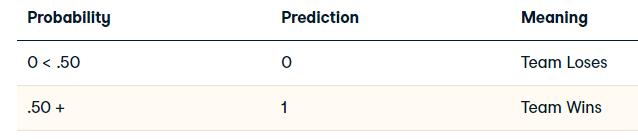

In this exercise, you look at the methods, `.predict()` and `.predict_proba()` using the `tic_tac_toe` dataset. The first method will give a prediction of whether Player One will win the game, and the second method will provide the probability of Player One winning. Use rfc as the random forest classification model.

- Create two arrays of predictions. One for the classification values and one for the predicted probabilities.

In [19]:
# Reading the data:
tic_tac_toe = pd.read_csv("./data/tic-tac-toe.csv")

In [20]:
# Exploring the data shape:
tic_tac_toe.shape

(958, 10)

In [21]:
# Exploring the first 5 rows:
tic_tac_toe.head()

,Top-Left,Top-Middle,Top-Right,Middle-Left,Middle-Middle,Middle-Right,Bottom-Left,Bottom-Middle,Bottom-Right,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [22]:
# Encoding the target column into (0 / 1):
tic_tac_toe['Class'] = tic_tac_toe['Class'].apply(lambda x : 1 if x == 'positive' else 0)

In [23]:
# Encoding the feaatures into (0 / 1):
features = [col for col in tic_tac_toe.columns if col != 'Class']
tic_tac_toe = pd.get_dummies(data=tic_tac_toe, columns=features)

In [24]:
# Slpitting the data into features matrix (X) & target column (y):
X, y = split_data(tic_tac_toe, 'Class')

In [25]:
# Splitting the data into training & hold-out sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=767, random_state=42)

In [26]:
# Initializing & fitting the model:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
# Making predictions necessary for model evaluation:
classification_predictions = rfc.predict(X_test)
probability_predictions = rfc.predict_proba(X_test)

- Use the `.value_counts()` method for a pandas Series to print the number of observations that were assigned to each class.

In [28]:
# Getting the count of each class:
classification_predictions = pd.Series(classification_predictions)
classification_predictions.value_counts()

1    583
0    184
dtype: int64

- Print the first observation of `probability_predictions` to see how the probabilities are structured.

In [29]:
# Printing the first prediction probability:
print(f"The first predicted probabilities are: {probability_predictions[0]}")

The first predicted probabilities are: [0.49 0.51]


### 3.2. Reusing model parameters

Replicating model performance is vital in model validation. Replication is also important when sharing models with co-workers, reusing models on new data or asking questions on a website such as Stack Overflow. You might use such a site to ask other coders about model errors, output, or performance. The best way to do this is to replicate your work by reusing model parameters.

In this exercise, you use various methods to recall which parameters were used in a model.

- Print out the characteristics of the model `rfc` by simply printing the model.

In [30]:
# Initializing the model with random state = 1111 (the rest hyperparameters were predefined):
rfc = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=1111)

In [31]:
# Printing the model:
print(rfc)

RandomForestClassifier(max_depth=6, n_estimators=50, random_state=1111)


- Print just the random state of the model.

In [32]:
# Printing the random state:
print(f"The random state is: {rfc.random_state}")

The random state is: 1111


- Print the dictionary of model parameters.

In [33]:
# Printing the model parameters using .get_params():
print(f"Printing the parameters dictionary: {rfc.get_params()}")

Printing the parameters dictionary: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 1111, 'verbose': 0, 'warm_start': False}


### 3.3. Random forest classifier

This exercise reviews the four modeling steps discussed throughout this chapter using a random forest classification model. You will:

1. Create a random forest classification model.
2. Fit the model using the `tic_tac_toe` dataset.
3. Make predictions on whether Player One will win (1) or lose (0) the current game.
4. Finally, you will evaluate the overall accuracy of the model.

Let's get started!

- Create `rfc` using the scikit-learn implementation of random forest classifiers and set a random state of 1111.

In [34]:
# Initializing the model:
rfc = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=1111)

- Fit rfc using `X_train` for the training data and `y_train` for the responses.

In [35]:
# Fitting the model:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=50, random_state=1111)

- Predict the class values for `X_test`.

In [36]:
# Making predictions:
predictions = rfc.predict(X_test)
print(predictions[:5])

[1 1 1 1 0]


- Use the method `.score()` to print an accuracy metric for `X_test` given the actual values `y_test`.

In [37]:
# Printing model score:
print(rfc.score(X_test, y_test))

0.7979139504563233
